In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("primary_data.csv")

In [3]:
df_original = df.copy()

In [4]:
def remove_outliers(data, bairro, coluna, max_removidos):
    q1, q3 = data.loc[data["bairro"] == bairro, coluna].quantile([.25,.75])
    iqr = q3-q1
    lb = max(q1 - 1.5*iqr, 0)
    ub = q3 + 1.5*iqr
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    len_after = len(data.loc[(data["bairro"]==bairro) & (data[coluna].between(lb, ub)), coluna])
    removidos = 1-(len_after/len_before)
    print(f"{bairro}: remocao por iqr seria {removidos*100}%")
    if removidos < max_removidos:
        print(f"Lower bound: {lb}, upper bound: {ub}")
        print(f"Removidos por iqr: {removidos*100}%")
        data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    else:
        data = remove_outliers_percentis(data, bairro, coluna, lower_percentile=0, upper_percentile=(1-max_removidos))
    return data

In [5]:
def remove_outliers_percentis(data, bairro, coluna, lower_percentile=0.0, upper_percentile=.99):
    lb, ub = data.loc[data["bairro"]==bairro, coluna].quantile([lower_percentile, upper_percentile])
    len_before = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    data.loc[(data["bairro"]==bairro) & (~data[coluna].between(lb, ub)), coluna] = np.nan
    len_after = sum(~data.loc[data["bairro"] == bairro, coluna].isnull())
    print(f"Lower bound: {lb}, upper bound: {ub}")
    print(f"Removidos por percentis: {(1-(len_after/len_before))*100}% dos dados")
    return data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

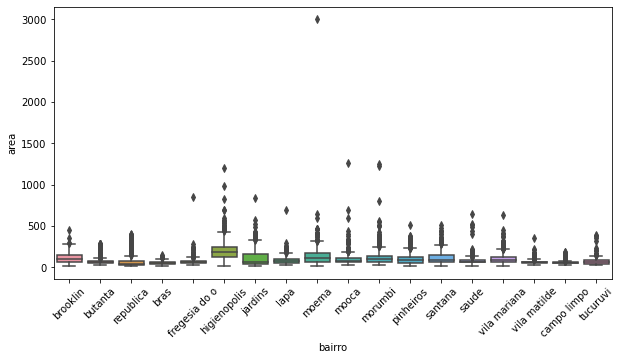

In [6]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation=45)

In [7]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "area", max_removidos=.05)

brooklin: remocao por iqr seria 0.487210718635811%
Lower bound: 0, upper bound: 286.5
Removidos por iqr: 0.487210718635811%
butanta: remocao por iqr seria 7.015457788347201%
Lower bound: 24.0, upper bound: 132.0
Removidos por percentis: 4.99405469678954% dos dados
republica: remocao por iqr seria 7.78032036613272%
Lower bound: 13.0, upper bound: 205.24999999999864
Removidos por percentis: 5.034324942791757% dos dados
bras: remocao por iqr seria 5.882352941176472%
Lower bound: 19.0, upper bound: 121.0
Removidos por percentis: 4.382929642445211% dos dados
fregesia do o: remocao por iqr seria 6.349206349206349%
Lower bound: 25.0, upper bound: 127.94999999999993
Removidos por percentis: 5.102040816326525% dos dados
higienopolis: remocao por iqr seria 3.4482758620689613%
Lower bound: 0, upper bound: 432.75
Removidos por iqr: 3.4482758620689613%
jardins: remocao por iqr seria 4.968152866242037%
Lower bound: 0, upper bound: 334.0
Removidos por iqr: 4.968152866242037%
lapa: remocao por iqr ser

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

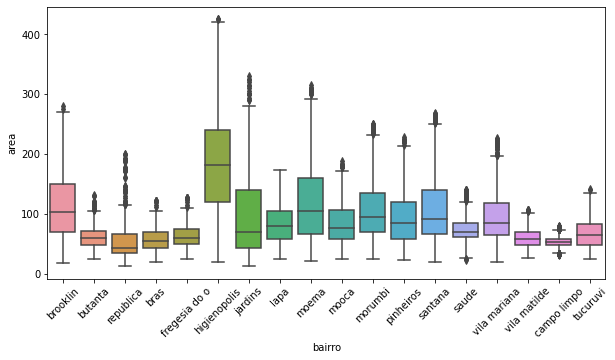

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "area"]], y="area", x="bairro")
plt.xticks(rotation=45)

In [9]:
df.columns[:15]

Index(['id', 'url', 'header', 'address', 'area', 'rooms', 'bathrooms',
       'garages', 'price', 'condo', 'bairro', 'crawled_at', 'Academia',
       'Aceita animais', 'Acesso para deficientes'],
      dtype='object')

In [10]:
df["rooms"].value_counts(normalize=True)

2     0.398728
3     0.361497
1     0.153448
4     0.082001
5     0.002687
6     0.000524
16    0.000393
20    0.000328
18    0.000131
15    0.000066
14    0.000066
17    0.000066
8     0.000066
Name: rooms, dtype: float64

In [11]:
df["rooms"].max()

20

In [12]:
df.loc[df["rooms"]>6, "rooms"] = np.nan

In [13]:
df["bathrooms"].value_counts(normalize=True)[:8].sum()

0.9990823282642894

In [14]:
df.loc[df["bathrooms"]>8, "bathrooms"] = np.nan

In [15]:
df["garages"].value_counts(normalize=True)[:7]

1    0.483613
2    0.261012
0    0.132341
3    0.075052
4    0.035199
5    0.007669
6    0.002950
Name: garages, dtype: float64

In [16]:
df.loc[df["garages"]>6, "garages"] = np.nan

In [17]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "price", max_removidos=.05)

brooklin: remocao por iqr seria 2.679658952496955%
Lower bound: 0, upper bound: 3425600.0
Removidos por iqr: 2.679658952496955%
butanta: remocao por iqr seria 5.945303210463737%
Lower bound: 147100.0, upper bound: 1030000.0
Removidos por percentis: 4.99405469678954% dos dados
republica: remocao por iqr seria 10.755148741418763%
Lower bound: 99000.0, upper bound: 1500000.0
Removidos por percentis: 4.919908466819223% dos dados
bras: remocao por iqr seria 0.5767012687427964%
Lower bound: 0, upper bound: 920250.0
Removidos por iqr: 0.5767012687427964%
fregesia do o: remocao por iqr seria 6.4625850340136015%
Lower bound: 111111.0, upper bound: 1098479.999999998
Removidos por percentis: 5.102040816326525% dos dados
higienopolis: remocao por iqr seria 8.251231527093594%
Lower bound: 273002.0, upper bound: 6067499.99999999
Removidos por percentis: 5.049261083743839% dos dados
jardins: remocao por iqr seria 8.662420382165603%
Lower bound: 190000.0, upper bound: 6814399.999999999
Removidos por p

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

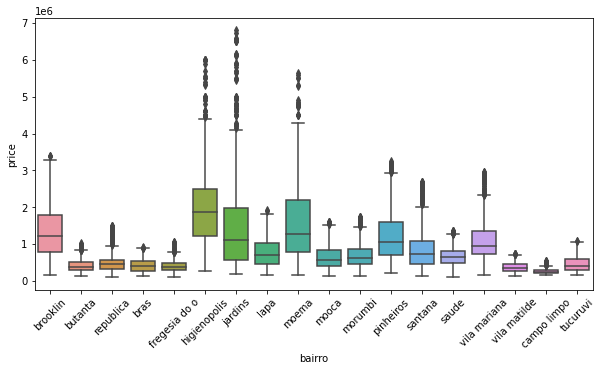

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "price"]], y="price", x="bairro")
plt.xticks(rotation=45)

In [19]:
df.loc[df["condo"]<100, "condo"] = np.nan

In [20]:
for bairro in df["bairro"].unique():
    df = remove_outliers(df, bairro, "condo", max_removidos=.05)

brooklin: remocao por iqr seria 3.271692745376953%
Lower bound: 0, upper bound: 2777.0
Removidos por iqr: 3.271692745376953%
butanta: remocao por iqr seria 3.0855539971949564%
Lower bound: 0, upper bound: 1305.0
Removidos por iqr: 3.0855539971949564%
republica: remocao por iqr seria 9.647979139504558%
Lower bound: 100.0, upper bound: 1474.9999999999966
Removidos por percentis: 5.0847457627118615% dos dados
bras: remocao por iqr seria 2.2292993630573243%
Lower bound: 0, upper bound: 890.5
Removidos por iqr: 2.2292993630573243%
fregesia do o: remocao por iqr seria 7.742782152230976%
Lower bound: 100.0, upper bound: 1222.95
Removidos por percentis: 5.118110236220474% dos dados
higienopolis: remocao por iqr seria 5.289672544080604%
Lower bound: 111.0, upper bound: 6219.0
Removidos por percentis: 4.534005037783373% dos dados
jardins: remocao por iqr seria 6.921944035346095%
Lower bound: 133.0, upper bound: 4908.000000000002
Removidos por percentis: 5.007363770250373% dos dados
lapa: remocao

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'brooklin'),
  Text(1, 0, 'butanta'),
  Text(2, 0, 'republica'),
  Text(3, 0, 'bras'),
  Text(4, 0, 'fregesia do o'),
  Text(5, 0, 'higienopolis'),
  Text(6, 0, 'jardins'),
  Text(7, 0, 'lapa'),
  Text(8, 0, 'moema'),
  Text(9, 0, 'mooca'),
  Text(10, 0, 'morumbi'),
  Text(11, 0, 'pinheiros'),
  Text(12, 0, 'santana'),
  Text(13, 0, 'saude'),
  Text(14, 0, 'vila mariana'),
  Text(15, 0, 'vila matilde'),
  Text(16, 0, 'campo limpo'),
  Text(17, 0, 'tucuruvi')])

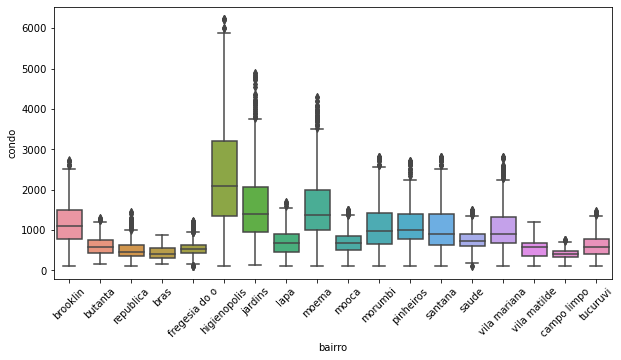

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["bairro", "condo"]], y="condo", x="bairro")
plt.xticks(rotation=45)

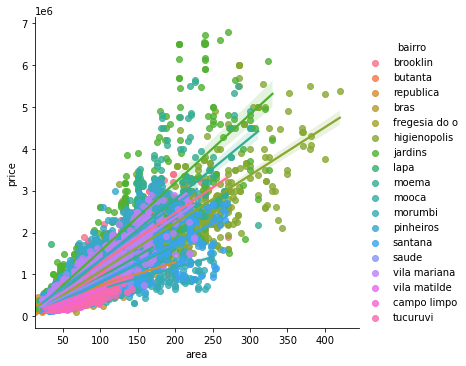

In [22]:
sns.lmplot(data=df, x="area", y="price", hue="bairro")

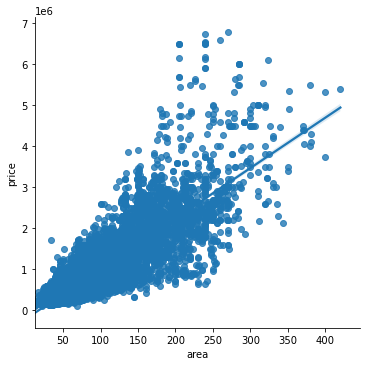

In [23]:
sns.lmplot(data=df, x="area", y="price")

In [24]:
df.isnull().sum()[:15]

id                            0
url                           0
header                        0
address                       0
area                        615
rooms                        17
bathrooms                    13
garages                      33
price                       628
condo                      2846
bairro                        0
crawled_at                    0
Academia                      0
Aceita animais                0
Acesso para deficientes       0
dtype: int64

In [25]:
df[df.columns[4:10]].corr()

,area,rooms,bathrooms,garages,price,condo
area,1.000000,0.697479,0.767032,0.715472,0.846341,0.843835
rooms,0.697479,1.000000,0.694981,0.652029,0.503955,0.505980
bathrooms,0.767032,0.694981,1.000000,0.740149,0.676715,0.617686
garages,0.715472,0.652029,0.740149,1.000000,0.624047,0.623913
price,0.846341,0.503955,0.676715,0.624047,1.000000,0.804861
condo,0.843835,0.505980,0.617686,0.623913,0.804861,1.000000


In [26]:
len(df.dropna(subset=["area", "rooms", "bathrooms", "garages", "price"]))/len(df)

0.9390403775563713

In [27]:
df.to_csv("intermediate_data.csv", index=False)